In [1]:
## Analysis
import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

In [2]:
fname = '../data/UTR_5_3_sequence.txt'
df_utr = pd.read_csv(fname, sep='\t', comment='#',
                      names=['operon', 'TU', 'promoter', 'TSS', 'TU_DNA', 'TU_firstgene', 'TU_lastgene',
                             'terminator', 'coord', 'coord_5UTR', '5UTR', 'coord_3UTR', '3UTR'])
df_utr.head(5)

,operon,TU,promoter,TSS,TU_DNA,TU_firstgene,TU_lastgene,terminator,coord,coord_5UTR,5UTR,coord_3UTR,3UTR
0,thrLABC,thrLABC,thrLp,148.0,forward,"thrL(190,255)","thrC(3734,5020)","rho-independent(5032,5086)",148-5086,148-190,ATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCA,5020-5086,AAATCTATTCATTATCTCAATCAGGCCGGGTTTGCTTTTATGCAGC...
1,thrLABC,thrL,thrLp,148.0,forward,"thrL(190,255)","thrL(190,255)","rho-independent(274,310)",148-310,148-190,ATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCA,255-310,ACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGG...
2,talB,talB,talBp,8191.0,forward,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATCA,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA
3,mbiA,htgA,htgAp2,10643.0,forward,"mbiA(10830,11315)","mbiA(10830,11315)",NaN,10643-11315,10643-10830,TCAGACCTGAGTGGCGCTAACCATCCGGCGCAGGCAGGCGATTTGC...,NaN,NaN
4,mbiA,htgA,htgAp1,10644.0,forward,"mbiA(10830,11315)","mbiA(10830,11315)",NaN,10644-11315,10644-10830,CAGACCTGAGTGGCGCTAACCATCCGGCGCAGGCAGGCGATTTGCA...,NaN,NaN


In [3]:
fname = '../data/Gene_sequence.txt'
df_cds = pd.read_csv(fname, sep='\t', comment='#',
                      names=['id', 'name', 'left_coord', 'right_coord', 'DNA_strand', 'product_type', 'product_name',
                             'start_codon', 'stop_codon', 'seq', 'bnumber', 'other_ids', 'random'])
df_cds.head(5)

,id,name,left_coord,right_coord,DNA_strand,product_type,product_name,start_codon,stop_codon,seq,bnumber,other_ids,random
0,ECK120001251,thrL(b0001),190.0,255.0,forward,-,<i>thr</i> operon leader peptide,ATG,TGA,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,b0001,NaN,NaN
1,ECK120000987,thrA(b0002),337.0,2799.0,forward,-,fused aspartate kinase/homoserine dehydrogenase 1,ATG,TGA,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,b0002,NaN,NaN
2,ECK120000988,thrB(b0003),2801.0,3733.0,forward,-,homoserine kinase,ATG,TAA,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,b0003,NaN,NaN
3,ECK120000989,thrC(b0004),3734.0,5020.0,forward,-,threonine synthase,ATG,TAA,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,b0004,NaN,NaN
4,ECK120002701,yaaX(b0005),5234.0,5530.0,forward,-,DUF2502 domain-containing protein YaaX,GTG,TAA,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,b0005,NaN,NaN


In [4]:
df_utr.dropna(how='any', inplace=True)

In [5]:
df_utr['5utr_len'] = df_utr.apply(lambda row: len(row['5UTR']), axis=1)

In [6]:
df_utr['3utr_len'] = df_utr.apply(lambda row: len(row['3UTR']), axis=1)

In [7]:
df_cds.drop(labels=['bnumber', 'random', 'other_ids'], axis=1, inplace=True)
df_cds.dropna(how='any', inplace=True)

In [8]:
df_cds['cds_len'] = df_cds.apply(lambda row: len(row['seq']), axis=1)

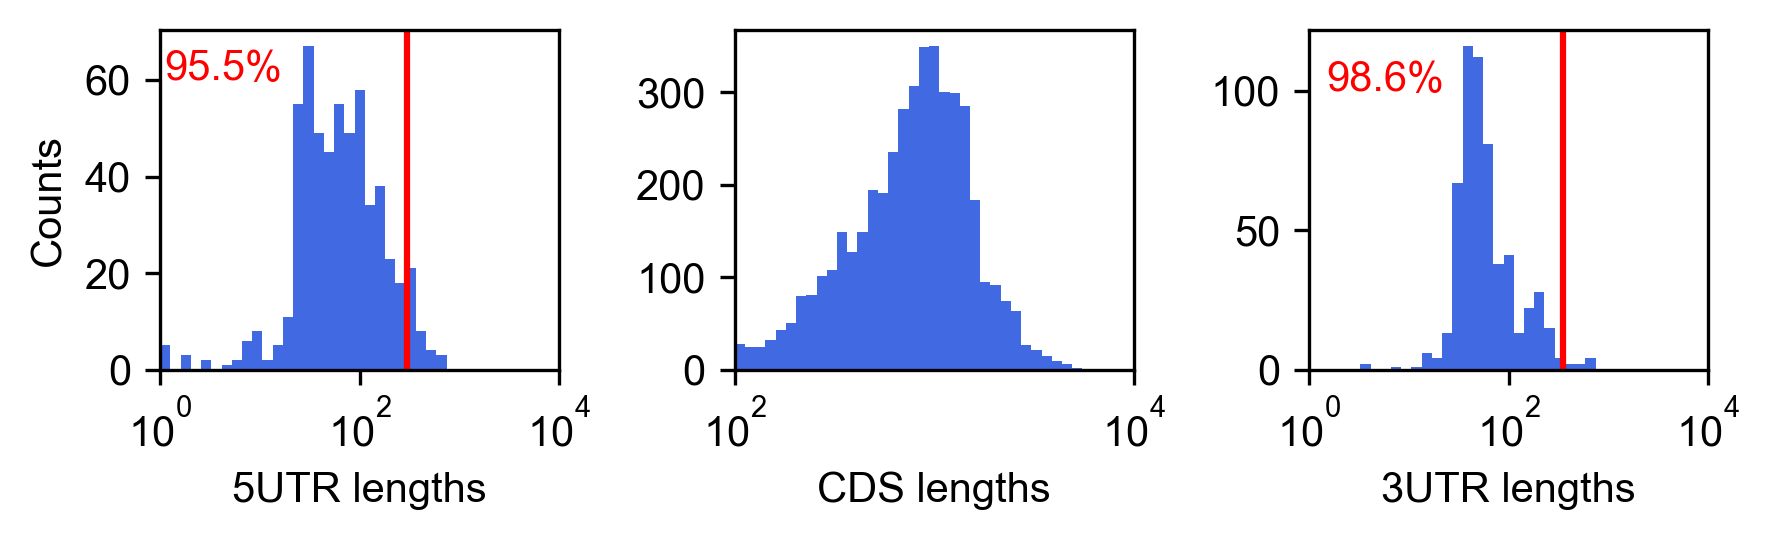

In [9]:
mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(6,1.9)) #(6,1.6)
plt.subplot(1,3,1)

bmin, bmax = 1, 10000.0
logbins = 10 ** np.linspace(np.log10(bmin), np.log10(bmax), 40)
plt.hist(df_utr['5utr_len'], bins = logbins, color='royalblue')
plt.axvline(300, color='r')
plt.xscale('log')
plt.xlim(1,10000)
#plt.ylim(1,650)
plt.ylabel('Counts')
plt.xlabel('5UTR lengths')

ann = 100*(sum(df_utr['5utr_len'] <= 300)/df_utr['5utr_len'].shape[0])
plt.annotate('%.1f'%(ann)+'%',xy=(1.1,60),
            color='r',size=10)

plt.subplot(1,3,2)
bmin, bmax = 100, 10000.0
logbins = 10 ** np.linspace(np.log10(bmin), np.log10(bmax), 40)
plt.hist(df_cds['cds_len'], bins = logbins,color='royalblue')
plt.xscale('log')
plt.xlim(100,10000)
plt.xlabel('CDS lengths')

plt.subplot(1,3,3)
bmin, bmax = 1, 10000.0
logbins = 10 ** np.linspace(np.log10(bmin), np.log10(bmax), 40)
plt.hist(df_utr['3utr_len'], bins = logbins,color='royalblue')
plt.axvline(350, color='r')
plt.xscale('log')
plt.xlim(1,10000)
plt.xlabel('3UTR lengths')

ann = 100*(sum(df_utr['3utr_len'] <= 350)/df_utr['3utr_len'].shape[0])
plt.annotate('%.1f'%(ann)+'%',xy=(1.5,100),
            color='r',size=10)

plt.tight_layout()
plt.savefig('../figures/f1d.svg')